Time dependent Schrodinger equation.

In [11]:
import PyPlot
const plt = PyPlot
plt.svg(true);

Free particle Hamiltonian:

$$
H_{0} = -\frac{\hbar^2}{2m}\frac{\mathrm{d}^2}{\mathrm{d}x^2}
$$

with the following eigenstates:

$$
\frac{1}{2\pi} \exp\left[ \mathrm{i}\left( kx - \omega(k)t \right) \right]
$$

$$
\omega(k) = E = \frac{k^2}{2m}
$$

The wavepacket is defined as:

$$
\psi(x,t) = 
\frac{1}{2\pi} \int_{-\infty}^{\infty} A(k) \exp\left[ \mathrm{i} \left( kx - \omega(k)t \right) \right]
\,\mathrm{d}k
$$


For Gaussian wave package, the amplitude is defined as:

$$
A(k) = \left( \frac{1}{\sigma\sqrt{\pi}} \right)^{1/2}\exp\left[
-\frac{(k-k_0)^2}{2\sigma^2}
\right]
$$

$$
\psi(x,t) = \left(
\frac{\sigma}{\sqrt{\pi}(1 + \mathrm{i}\Omega t)}
\right)^{1/2}
\exp\left[
-\frac{\sigma^2}{2} \frac{(x - vt)^2}{1 + \mathrm{i}\Omega t}
\right]
\mathrm{e}^{\mathrm{i}k_{0}(x - vt)}
$$

In [7]:
# \hbar = 1
# m = 1
function gaussian_wavepacket(σ, k0, x, t)
    Ω = σ^2 # hbar*sigma^2/m
    v = k0 # hbar*k0/m
    denum1 = 1 + im*Ω*t
    vt = v*t
    A = ( σ/(sqrt(pi)*denum1) )^0.5
    B = -0.5*σ^2*(x - vt)^2/denum1
    C = exp(-im*k0*(x - vt))
    return A*exp(B)*C
end

gaussian_wavepacket (generic function with 1 method)

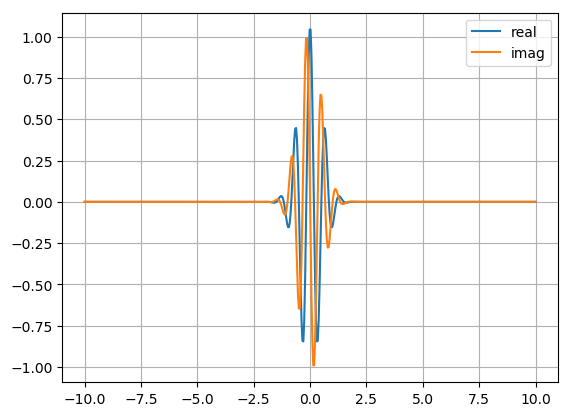

In [33]:
x_min = -10.0
x_max = 10.0
Npoints = 500
x = range(x_min, x_max, length=Npoints)
t = 0.0
k0 = 3*pi
σ = 2.0
psi = gaussian_wavepacket.(σ, k0, x, t);
plt.clf()
plt.plot(x, real(psi), label="real")
plt.plot(x, imag(psi), label="imag")
plt.grid()
plt.legend();

In [ ]:
#=
function gaussian_wavepacket(x,t,a0,p0)
    dc = 1.0 + 2.0*im*t/a0^2
    f = (2.0/(pi*a0^2*dc^2))^0.25*exp(
        -(x-p0*t)^2/(a0^2*dc))*exp(im*p0*(x-0.50*p0^2*t)) 
end
=#